<a href="https://colab.research.google.com/github/udayameister/Connectome/blob/main/bird_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization


In [2]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR10 has ten types of images labeled from 0 to 9. We only care about birds, which are labeled as class #2.
# So we'll cheat and change the Y values. Instead of each class being labeled from 0 to 9, we'll set it to True
# if it's a bird and False if it's not a bird.
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
x_train = x_train.reshape(50000,43072)
x_test = x_test.reshape(10000,3072)

ValueError: ignored

In [6]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print(x_test.shape)
print(x_train.shape)

(10000, 3072)
(50000, 3072)


In [26]:
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
model.add(Dense(1024, input_dim=3072,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [27]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 1024)              3146752   
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 512)               524800    
                                                                 
 batch_normalization_3 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)              

In [28]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [29]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 15s 8ms/step - loss: 0.3046 - accuracy: 0.8992 - val_loss: 0.2981 - val_accuracy: 0.9000
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2876 - accuracy: 0.8999 - val_loss: 0.2889 - val_accuracy: 0.8997
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2783 - accuracy: 0.9001 - val_loss: 0.3094 - val_accuracy: 0.8894
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2727 - accuracy: 0.9001 - val_loss: 0.3064 - val_accuracy: 0.9002
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2697 - accuracy: 0.9006 - val_loss: 0.2987 - val_accuracy: 0.8911
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.2644 - accuracy: 0.9013 - val_loss: 0.2754 - val_accuracy: 0.9011
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2588 - accuracy: 0.9033 - val_loss: 0.2993 - val_ac

In [34]:

# Save the trained model to a file so we can use it to make predictions later
model.save("bird_model.h5")

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [36]:
# Load the model we trained
model = load_model('bird_model.h5')


In [37]:
predictions = model.predict(x_test, batch_size=32, verbose=1)



313/313 [==============================] - 1s 3ms/step


In [38]:
predictions[0]

array([0.39033175], dtype=float32)

In [39]:
# If the model is more than 50% sure the object is a bird, call it a bird.
# Otherwise, call it "not a bird".
predictions = predictions > 0.5

# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate Precision and Recall for each class
report = classification_report(y_test, predictions)
print(report)

True Positives: 193
True Negatives: 8790
False Positives: 210
False Negatives: 807
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      9000
           1       0.48      0.19      0.28      1000

    accuracy                           0.90     10000
   macro avg       0.70      0.58      0.61     10000
weighted avg       0.87      0.90      0.88     10000



1/1 [==============================] - 0s 20ms/step
[[0.41735232]]
not bird


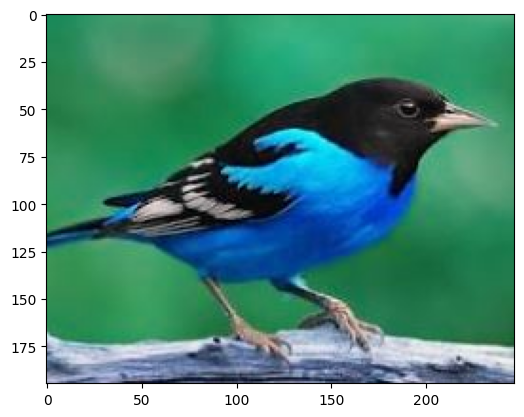

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("/content/111.JPG")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()
img1=img1.reshape(1,-1)
# insert a new axis along the row
#sample_test_image = x_test[100]
#b = np.expand_dims(img2, axis=0)
res=model.predict(img1)
#print(label_name[int(res)])

plt.imshow(img)
print(res)
if res > 0.5:
  print("bird")
else:
  print("not bird")